In [4]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [5]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [6]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

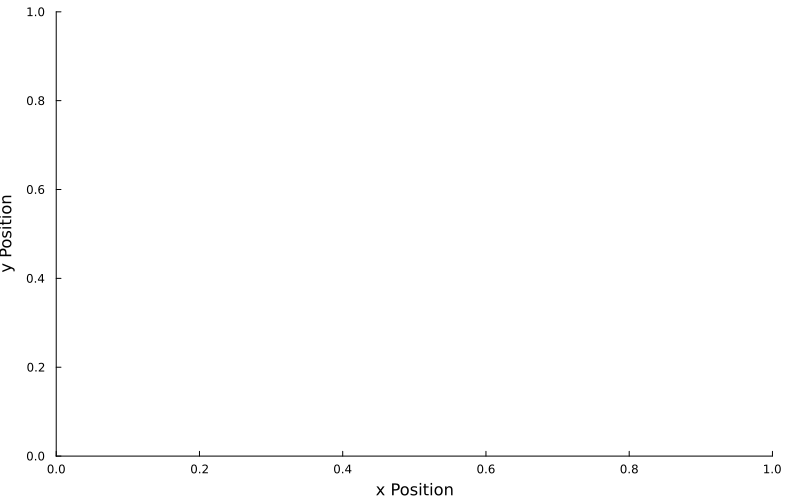

In [7]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

In [8]:
ops = gaussian_operators_2D(0.05, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}(0.05, [0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#gauss2DN#37"{var"#gauss2D#36"}(var"#gauss2D#36"())), var"#Φ#40"{var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}}(var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}(0.05, [0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#gauss2DN#37"{var"#gauss2D#36"}(var"#gauss2D#36"()))), var"#adjΦ#41"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#35#42"{var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 

## Spurious spikes for degenerate pre-certificate

In [9]:
function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

add_noise (generic function with 1 method)

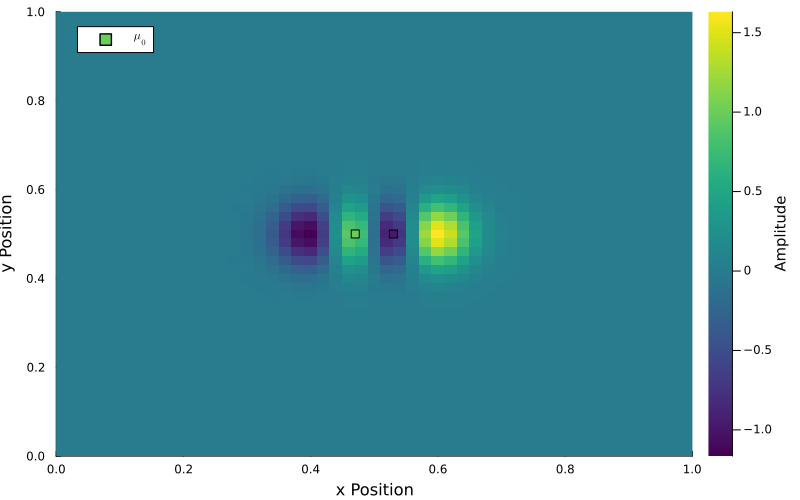

In [11]:
x0 = [[0.47, 0.53], [0.5, 0.5]]
a0 = [1.0, -1.0]

y0 = ops.Φ(x0..., a0)

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square)

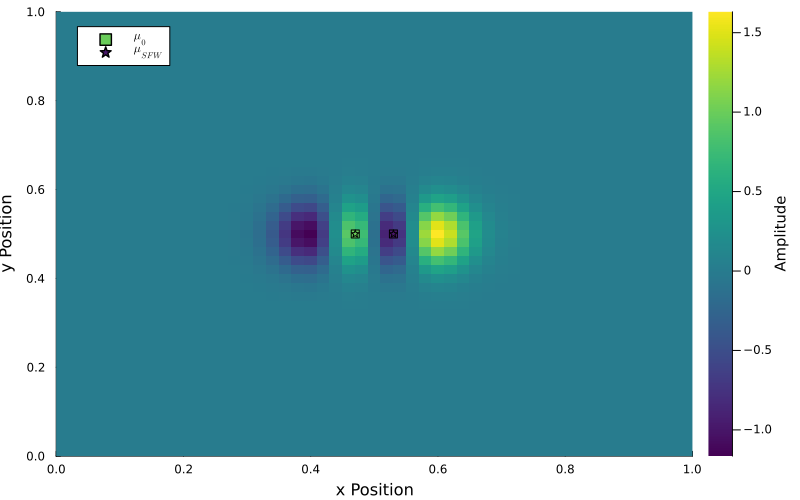

In [ ]:
λ = 0.001

prob = BLASSO(y0, ops, λ, domain)
solve!(prob, :SFW)

plt_spurious = deepcopy(plt_cert)
plot_spikes!(plt_spurious, prob.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)

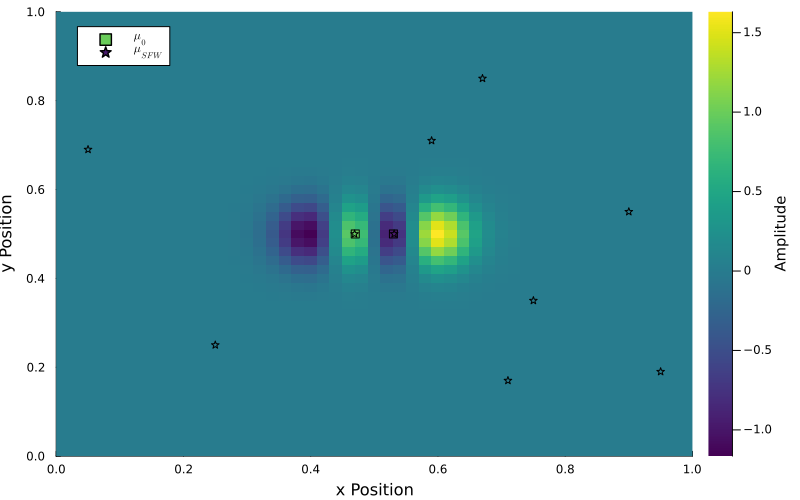

In [18]:
y = add_noise(y0, 0.1)
λ = 0.05

Random.seed!(2)

prob = BLASSO(y, ops, λ, domain)
solve!(prob, :SFW)

plt_spurious_ns = deepcopy(plt_cert)
plot_spikes!(plt_spurious_ns, prob.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)

  0.276720 seconds (4.67 M allocations: 213.516 MiB, 10.88% gc time)
  0.306245 seconds (4.68 M allocations: 214.000 MiB, 11.73% gc time)
  0.292728 seconds (4.69 M allocations: 214.484 MiB, 10.25% gc time)
  0.269259 seconds (4.70 M allocations: 214.969 MiB, 8.32% gc time)
  0.267099 seconds (4.71 M allocations: 215.453 MiB, 9.85% gc time)
  0.319368 seconds (4.72 M allocations: 215.937 MiB, 10.21% gc time)
  0.409431 seconds (4.73 M allocations: 216.421 MiB, 9.09% gc time)
  0.286670 seconds (4.74 M allocations: 216.905 MiB, 6.86% gc time)
  0.726575 seconds (4.76 M allocations: 217.389 MiB, 62.29% gc time)
  0.293071 seconds (4.77 M allocations: 217.873 MiB, 8.99% gc time)


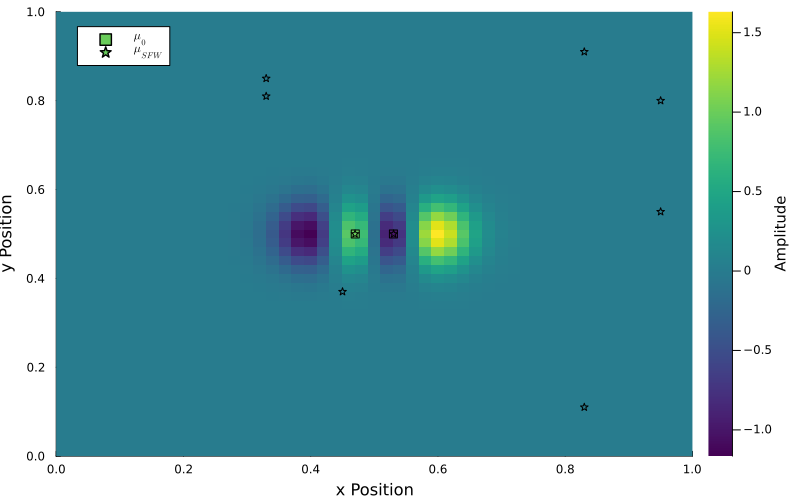

In [14]:
y = add_noise(y0, 0.02)
λ = 0.01

Random.seed!(2)

prob = BLASSO(y, ops, λ, domain)
solve!(prob, :SFW)

plt_spurious_ns = deepcopy(plt_cert)
plot_spikes!(plt_spurious_ns, prob.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)